# Import libraries

In [46]:
import pandas as pd 
from warnings import filterwarnings
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
filterwarnings('ignore')

# Read and explore the data

In [47]:
data_train = pd.read_csv('datos/mnist_train.csv', header=None)
data_test = pd.read_csv('datos/mnist_test.csv', header=None)

In [48]:
data_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
data_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


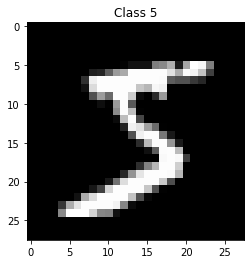

In [50]:
# see the visual representation of the data
plt.imshow(data_train.drop(0, axis=1).values[0].reshape(28,28), cmap = 'gray')
plt.title("Class " + str(data_train[0][0]))
plt.show()

In [51]:
print(data_train.shape)
print(data_test.shape)

(60000, 785)
(10000, 785)


In [52]:
null_values_train =  data_train.isnull().sum().sum()
null_values_test = data_test.isnull().sum().sum()

print("train data have", null_values_train, "nulls")
print("test data have", null_values_test, "nulls")

train data have 0 nulls
test data have 0 nulls


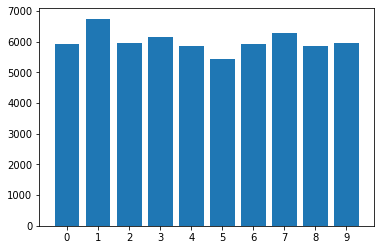

In [53]:
# see how much data there is of each type
number_counts = data_train[0].value_counts(ascending=True)

plt.bar(number_counts.keys(), number_counts.values)
plt.xticks(number_counts.keys())
plt.show()

# Process the data

In [54]:
# split data into x and y variable
x_train = data_train.drop(0, axis=1).values
x_test = data_test.drop(0, axis=1).values
y_train = data_train[0].values
y_test = data_test[0].values
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [55]:
# convert a vector of 784 variables into a 28 x 28 matrix (784 = 28 x 28)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32')
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32')
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [56]:
print(x_train.max())
x_train = x_train/255.0 # normalize the data by dividing each of them by the maximum
x_test = x_test/255.0 
print(x_train.max()) # So data are between 0 and 1

255.0
1.0


In [57]:
# Convert y variable into categorical variable
num_classes = len(number_counts)
y_train = to_categorical(y_train, num_classes = num_classes)
y_test = to_categorical(y_test, num_classes = num_classes)
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# CNN Convolutional Neural Network

In [58]:
# Librerias
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import visualkeras
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

In [59]:
def consrtuct_cnn_model():
    model = Sequential()

    # layers
    model.add(Conv2D(32, (3, 3), input_shape=x_train.shape[1:]))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2))) 
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation="softmax"))

    return model

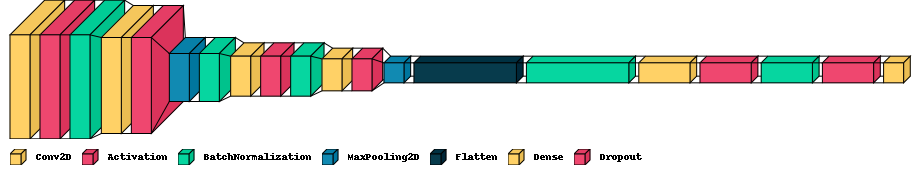

In [60]:
# visualize the model
cnn_model = consrtuct_cnn_model()

visualkeras.layered_view(cnn_model, legend=True)

In [61]:
cnn_model.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
# fit model
cnn_model.fit(x_train, y_train, batch_size=128, epochs=5)


Epoch 1/5
469/469 [==============================] - 73s 153ms/step - loss: 0.0974 - accuracy: 0.9706
Epoch 2/5
469/469 [==============================] - 71s 152ms/step - loss: 0.0343 - accuracy: 0.9893
Epoch 3/5
469/469 [==============================] - 73s 156ms/step - loss: 0.0242 - accuracy: 0.9921
Epoch 4/5
469/469 [==============================] - 77s 164ms/step - loss: 0.0181 - accuracy: 0.9937
Epoch 5/5
469/469 [==============================] - 73s 157ms/step - loss: 0.0166 - accuracy: 0.9945


313/313 [==============================] - 3s 10ms/step


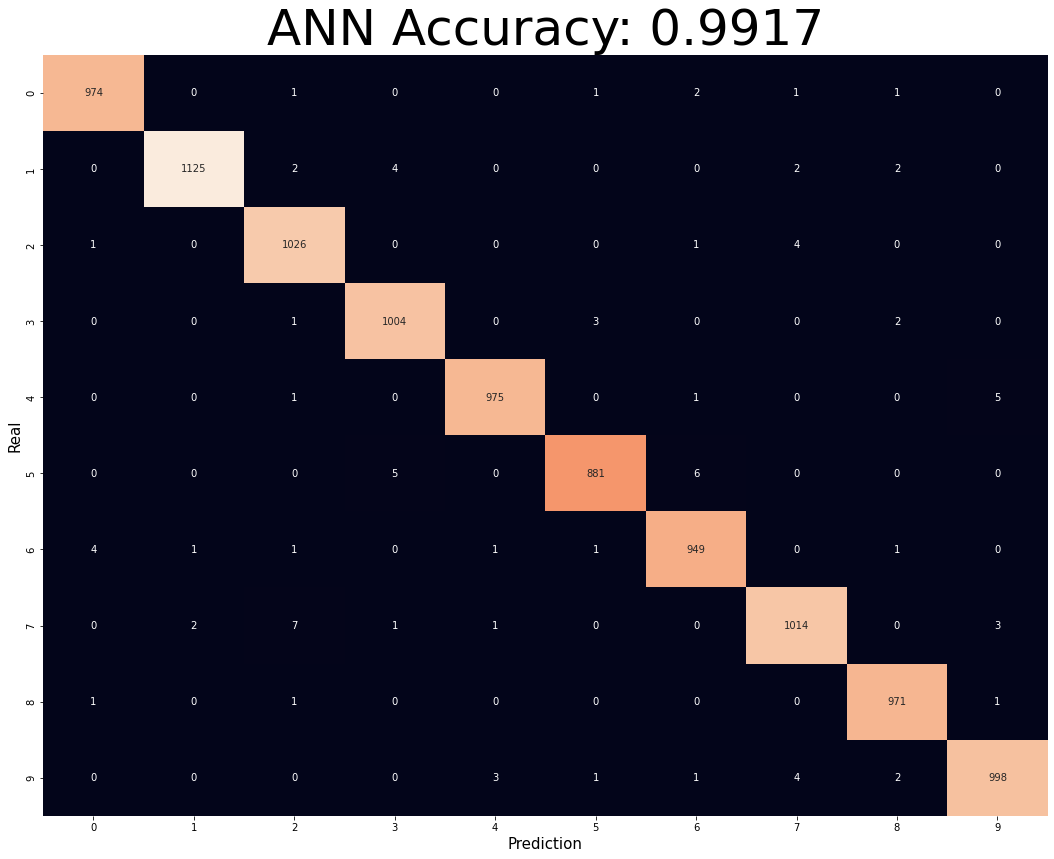

In [62]:
# predict the test data
y_pred = cnn_model.predict(x_test)
# accuracy of predict
cnn_accuracy = accuracy_score(y_test.argmax(axis=-1), y_pred.argmax(axis=-1))

# confusion matrix
cnn_confusion_matrix = confusion_matrix(y_test.argmax(axis=-1), y_pred.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(cnn_confusion_matrix, annot=True, fmt="1d", cbar=False)
plt.title("ANN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Prediction",fontsize=15)
plt.ylabel("Real",fontsize=15)
plt.show()

In [63]:
# fit the model with variations of the images
cnn_model_data_gen = consrtuct_cnn_model()
cnn_model_data_gen.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
train_generator = ImageDataGenerator(rotation_range=7, width_shift_range=0.05, shear_range=0.2,
                                     height_shift_range=0.07, zoom_range=0.05)
test_generator = ImageDataGenerator()
train_generator = train_generator.flow(x_train, y_train, batch_size=64)
test_generator = test_generator.flow(x_test, y_test, batch_size=64)
cnn_model_data_gen.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5,
                    validation_data=test_generator, validation_steps=10000//64)

Epoch 1/5
937/937 [==============================] - 87s 92ms/step - loss: 0.1287 - accuracy: 0.9609 - val_loss: 0.0544 - val_accuracy: 0.9826
Epoch 2/5
937/937 [==============================] - 86s 91ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.0275 - val_accuracy: 0.9911
Epoch 3/5
937/937 [==============================] - 87s 92ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.0233 - val_accuracy: 0.9921
Epoch 4/5
937/937 [==============================] - 86s 92ms/step - loss: 0.0392 - accuracy: 0.9879 - val_loss: 0.0208 - val_accuracy: 0.9931
Epoch 5/5
937/937 [==============================] - 86s 92ms/step - loss: 0.0356 - accuracy: 0.9890 - val_loss: 0.0209 - val_accuracy: 0.9938


313/313 [==============================] - 4s 11ms/step


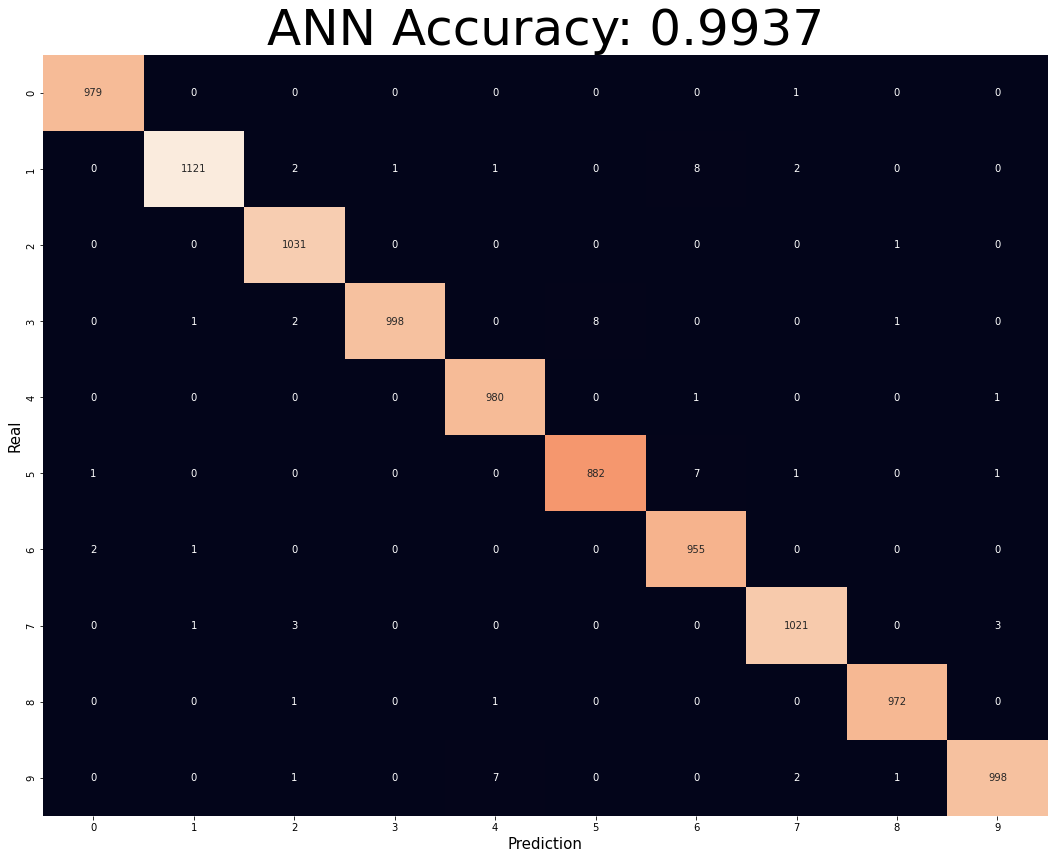

In [64]:
# predict the test data
y_pred = cnn_model_data_gen.predict(x_test)
# accuracy of predict
cnn_accuracy = accuracy_score(y_test.argmax(axis=-1), y_pred.argmax(axis=-1))

# confusion matrix
cnn_confusion_matrix = confusion_matrix(y_test.argmax(axis=-1), y_pred.argmax(axis=-1))
plt.subplots(figsize=(18,14))
sns.heatmap(cnn_confusion_matrix, annot=True, fmt="1d", cbar=False)
plt.title("ANN Accuracy: {}".format(cnn_accuracy),fontsize=50)
plt.xlabel("Prediction",fontsize=15)
plt.ylabel("Real",fontsize=15)
plt.show()

In [65]:
# save the model for future use
cnn_model_data_gen.save('cnn_model')

INFO:tensorflow:Assets written to: cnn_model\assets


INFO:tensorflow:Assets written to: cnn_model\assets
